# **Chapter 3. Python 을 활용한 데이터 전처리** 





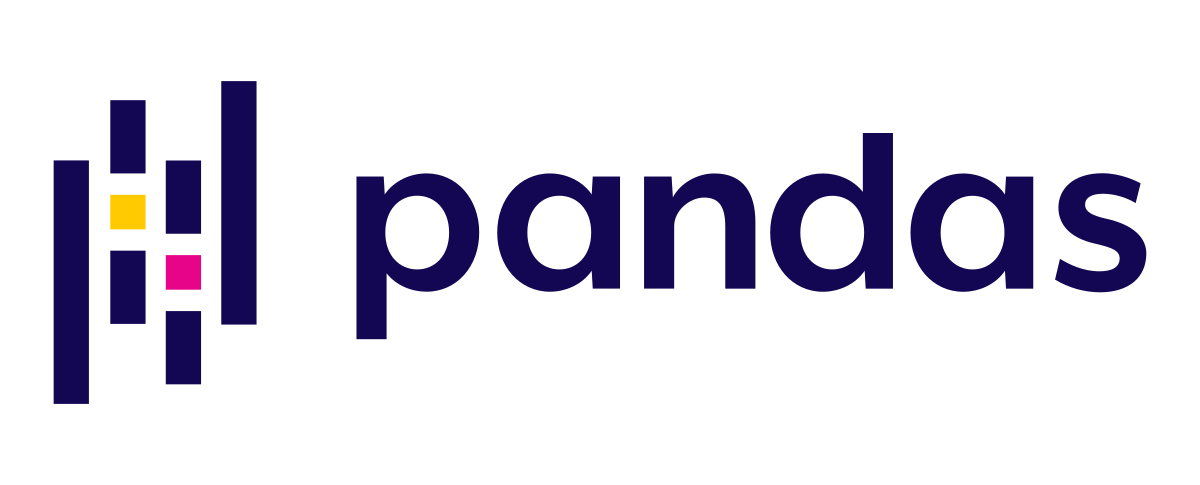


---
### **학습 목표**
> 3-4. Pandas 란? <br>
> 3-5. csv, excel 파일 읽고 쓰기, 요약 정보 한눈에 확인하기 <br>
> 3-6. 데이터 슬라이싱을 통해 Pandas 익숙해지기 <br>
> **3-7. 통계값 계산 및 정렬 방법 익히기** <br>
> 3-8. 피벗 테이블(pivot table) 기능과 그룹 통계(groupby) <br>
> 3-9. 데이터 합치기 (Join 과 Merge) <br>
> 3-10. 자료형 변환, 산술 연산 <br>
> 3-11. 전처리의 기본! 결측값, 중복 처리 <br>
> 3-12. 고급 기능 (apply, lambda, map) 으로 나도 이제 Pandas 고수! <br>
> 3-13. Pandas 시각화로 멋지게 레포팅하자 <br>
> 3-14. 실습 예제 <br>

## 3-7. 통계값 계산 및 정렬 방법 익히기

In [1]:
# 라이브러리 임포트
import pandas as pd

In [2]:
# 실습 파일 로딩 (아이돌 프로필)
# df = pd.read_csv('https://bit.ly/3gRXTfD')
df = pd.read_csv('kpop_idols.csv')
df

Profile Stage Name        Full Name Korean Name K. Stage Name  \
0     Profile    Taeyeon      Kim Taeyeon         김태연            태연   
1         NaN      Sunny       Lee Sunkyu         이순규            써니   
2         NaN    Tiffany    Hwang Miyoung         황미영           티파니   
3         NaN    Hyoyeon      Kim Hyoyeon         김효연            효연   
4         NaN       Yuri        Kwon Yuri         권유리            유리   
...       ...        ...              ...         ...           ...   
1589      NaN     Ririka   Kishida Ririka     키시다 리리카           리리카   
1590      NaN       Nayu        Kim Yewon         김예원            나유   
1591      NaN       Elva      Lee Yonghwa         이용화            엘바   
1592      NaN       Lily  Lily Jin Morrow    릴리 진 머로우            릴리   
1593      NaN     Haewon        Oh Haewon         오해원            해원   

     Date of Birth  Group      Country Second Country  Height  Weight  \
0       1989-03-09   SNSD  South Korea            NaN     160      44   
1       1989-05-15   SNSD  South Korea            NaN     158      43   
2       1989-08-01   SNSD  South Korea            USA     163      50   
3       1989-09-22   SNSD  South Korea            NaN     158      48   
4       1989-12-05   SNSD  South Korea            NaN     167      45   
...            ...    ...          ...            ...     ...     ...   
1589    2002-07-02  ILY:1        Japan            NaN     162       0   
1590    2002-07-23  ILY:1  South Korea            NaN       0       0   
1591    2003-05-05  ILY:1  South Korea            NaN       0       0   
1592    2002-10-17  NMIXX    Australia    South Korea       0       0   
1593    2003-02-25  NMIXX  South Korea            NaN       0       0   

         Birthplace Other Group Former Group Gender               Position  \
0            Jeonju  TTS, Oh!GG          NaN      F  Leader, Main Vocalist   
1        California         NaN          NaN      F                    NaN   
2     San Francisco         TTS          NaN      F                    NaN   
3           Incheon         NaN          NaN      F                    NaN   
4            Goyang         NaN          NaN      F                    NaN   
...             ...         ...          ...    ...                    ...   
1589            NaN         NaN          NaN      F                    NaN   
1590            NaN         NaN          NaN      F                    NaN   
1591            NaN         NaN          NaN      F                    NaN   
1592     Marysville         NaN          NaN      F                    NaN   
1593            NaN         NaN          NaN      F                    NaN   

         Instagram Twitter  
0       taeyeon_ss     NaN  
1       svnnynight     NaN  
2     xolovestephi     NaN  
3      watasiwahyo     NaN  
4          yulyulk     NaN  
...            ...     ...  
1589           NaN     NaN  
1590           NaN     NaN  
1591           NaN     NaN  
1592           NaN     NaN  
1593           NaN     NaN  

[1594 rows x 18 columns]

In [3]:
# 상위 8개 정보만 사용
df = df.iloc[:,1:11].head(8)
df

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
6      Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
7    Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44  
1  South Korea            NaN     158      43  
2  South Korea            USA     163      50  
3  South Korea            NaN     158      48  
4  South Korea            NaN     167      45  
5  South Korea            NaN     170      48  
6  South Korea            NaN     166      47  
7  South Korea            NaN     168      48

> ###  **3-7-1. 요약 정보 확인**


> **`info()` 를 사용한 요약 정보 확인**
> - `info()` 는 주로 전체 레코드 수, 없는 값 (Null 값) 과 컬럼 수, 데이터 타입 등을 확인할 때 사용합니다.

In [4]:
# 코드를 입력해 주세요
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Stage Name      8 non-null      object
 1   Full Name       8 non-null      object
 2   Korean Name     8 non-null      object
 3   K. Stage Name   8 non-null      object
 4   Date of Birth   8 non-null      object
 5   Group           8 non-null      object
 6   Country         8 non-null      object
 7   Second Country  1 non-null      object
 8   Height          8 non-null      int64 
 9   Weight          8 non-null      int64 
dtypes: int64(2), object(8)
memory usage: 772.0+ bytes


> **`shape` 을 사용한 데이터 프레임 형태 확인**
> - `shape` 은 튜플(tuple) 형태로 데이터 프레임의 형태를 알려주며, 첫번째는 행(row), 두번째는 열(column) 정보를 의미합니다.

In [5]:
# 코드를 입력해 주세요
df.shape

(8, 10)

> **`head()`, `tail()` 을 사용한 부분 정보 출력**

In [6]:
df.head()

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44  
1  South Korea            NaN     158      43  
2  South Korea            USA     163      50  
3  South Korea            NaN     158      48  
4  South Korea            NaN     167      45

In [7]:
df.head(3)

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44  
1  South Korea            NaN     158      43  
2  South Korea            USA     163      50

In [8]:
df.tail()

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
6      Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
7    Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   

       Country Second Country  Height  Weight  
3  South Korea            NaN     158      48  
4  South Korea            NaN     167      45  
5  South Korea            NaN     170      48  
6  South Korea            NaN     166      47  
7  South Korea            NaN     168      48

In [9]:
df.tail(3)

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
6      Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
7    Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   

       Country Second Country  Height  Weight  
5  South Korea            NaN     170      48  
6  South Korea            NaN     166      47  
7  South Korea            NaN     168      48

> **`describe()` 를 사용한 통계 정보 확인**
> - `describe()` 는 주로 데이터 분석을 시작하기 전, **숫자형 데이터가 어떻게 생겼는지** 빠르게 **요약 통계 정보를 확인**하기 위해 사용합니다.
> - 갯수(count), 평균(mean), 표준편차(std), 최소값(min), 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최대값(max) 

In [10]:
df.describe()

Height     Weight
count    8.000000   8.000000
mean   163.750000  46.625000
std      4.682795   2.386719
min    158.000000  43.000000
25%    159.500000  44.750000
50%    164.500000  47.500000
75%    167.250000  48.000000
max    170.000000  50.000000

In [11]:
df.describe(include='all')  # 전체 데이터타입을 모두 포함

Stage Name    Full Name Korean Name K. Stage Name Date of Birth Group  \
count           8            8           8             8             8     8   
unique          8            8           8             8             8     1   
top       Taeyeon  Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
freq            1            1           1             1             1     8   
mean          NaN          NaN         NaN           NaN           NaN   NaN   
std           NaN          NaN         NaN           NaN           NaN   NaN   
min           NaN          NaN         NaN           NaN           NaN   NaN   
25%           NaN          NaN         NaN           NaN           NaN   NaN   
50%           NaN          NaN         NaN           NaN           NaN   NaN   
75%           NaN          NaN         NaN           NaN           NaN   NaN   
max           NaN          NaN         NaN           NaN           NaN   NaN   

            Country Second Country      Height     Weight  
count             8              1    8.000000   8.000000  
unique            1              1         NaN        NaN  
top     South Korea            USA         NaN        NaN  
freq              8              1         NaN        NaN  
mean            NaN            NaN  163.750000  46.625000  
std             NaN            NaN    4.682795   2.386719  
min             NaN            NaN  158.000000  43.000000  
25%             NaN            NaN  159.500000  44.750000  
50%             NaN            NaN  164.500000  47.500000  
75%             NaN            NaN  167.250000  48.000000  
max             NaN            NaN  170.000000  50.000000

> ###  **3-7-2. 데이터프레임 정렬하기**


> **인덱스(index) 기준 정렬**
> - `sort_index()` 는 데이터 프레임 인덱스를 기준으로 정렬해줍니다

In [12]:
# 오름차순 정렬 (default 정렬)
df.sort_index()

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
6      Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
7    Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44  
1  South Korea            NaN     158      43  
2  South Korea            USA     163      50  
3  South Korea            NaN     158      48  
4  South Korea            NaN     167      45  
5  South Korea            NaN     170      48  
6  South Korea            NaN     166      47  
7  South Korea            NaN     168      48

In [13]:
# 내림차순 정렬 (ascending=False 추가)
df.sort_index(ascending=False)

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
7    Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   
6      Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   

       Country Second Country  Height  Weight  
7  South Korea            NaN     168      48  
6  South Korea            NaN     166      47  
5  South Korea            NaN     170      48  
4  South Korea            NaN     167      45  
3  South Korea            NaN     158      48  
2  South Korea            USA     163      50  
1  South Korea            NaN     158      43  
0  South Korea            NaN     160      44

> **값(value) 기준 정렬**
> - `sort_values()` 는 데이터 프레임의 값을 기준으로 정렬해줍니다

In [14]:
# 특정 컬럼 기준으로 정렬 (오름차순)
df.sort_values(by='Height')

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
6      Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
7    Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   

       Country Second Country  Height  Weight  
1  South Korea            NaN     158      43  
3  South Korea            NaN     158      48  
0  South Korea            NaN     160      44  
2  South Korea            USA     163      50  
6  South Korea            NaN     166      47  
4  South Korea            NaN     167      45  
7  South Korea            NaN     168      48  
5  South Korea            NaN     170      48

In [15]:
# 특정 컬럼 기준으로 정렬 (내림차순)
df.sort_values(by='Height', ascending=False)

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
7    Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
6      Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   

       Country Second Country  Height  Weight  
5  South Korea            NaN     170      48  
7  South Korea            NaN     168      48  
4  South Korea            NaN     167      45  
6  South Korea            NaN     166      47  
2  South Korea            USA     163      50  
0  South Korea            NaN     160      44  
3  South Korea            NaN     158      48  
1  South Korea            NaN     158      43

> **복수 값(Multi-values) 기준 정렬**
> - `sort_values(by=['컬럼1', '컬럼2', ...])` 는 복수 값을 기준으로도 데이터 프레임을 정렬할 수 있습니다.
> - 첫번째 값을 기준으로 우선 정렬을 하고, 그 다음 두번째 컬럼 기준으로 정렬되어가는 형태입니다.

In [16]:
# 복수 값 기준 정렬
df.sort_values(by=['Height', 'Weight'])

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
6      Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
7    Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   

       Country Second Country  Height  Weight  
1  South Korea            NaN     158      43  
3  South Korea            NaN     158      48  
0  South Korea            NaN     160      44  
2  South Korea            USA     163      50  
6  South Korea            NaN     166      47  
4  South Korea            NaN     167      45  
7  South Korea            NaN     168      48  
5  South Korea            NaN     170      48

In [17]:
# 복수 값 기준 정렬
df.sort_values(by=['Height', 'Weight'], ascending=False)

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
7    Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
6      Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   

       Country Second Country  Height  Weight  
5  South Korea            NaN     170      48  
7  South Korea            NaN     168      48  
4  South Korea            NaN     167      45  
6  South Korea            NaN     166      47  
2  South Korea            USA     163      50  
0  South Korea            NaN     160      44  
3  South Korea            NaN     158      48  
1  South Korea            NaN     158      43

In [18]:
# 복수 값 기준 정렬
df.sort_values(by=['Height', 'Weight'], ascending=[True, False])

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
6      Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
7    Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   

       Country Second Country  Height  Weight  
3  South Korea            NaN     158      48  
1  South Korea            NaN     158      43  
0  South Korea            NaN     160      44  
2  South Korea            USA     163      50  
6  South Korea            NaN     166      47  
4  South Korea            NaN     167      45  
7  South Korea            NaN     168      48  
5  South Korea            NaN     170      48